In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy as sp
import seaborn as sns
import math as m
from scipy import stats
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error

#import Algos
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#load train and test data
train_df=pd.read_csv('Training_dataset_Original.csv',index_col='application_key')
test_df=pd.read_csv('Evaluation_dataset.csv',index_col='application_key')

In [4]:
train_df.info()
#mvar2,mvar3,mvar4,mvar5,mvar21,mvar22,,mvar23,mvar24,mvar33,mvar44

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 230032 to 310031
Data columns (total 48 columns):
mvar1          80000 non-null object
mvar2          74447 non-null float64
mvar3          79499 non-null float64
mvar4          79499 non-null float64
mvar5          79499 non-null float64
mvar6          80000 non-null object
mvar7          80000 non-null object
mvar8          80000 non-null object
mvar9          80000 non-null object
mvar10         80000 non-null object
mvar11         80000 non-null object
mvar12         80000 non-null object
mvar13         80000 non-null object
mvar14         80000 non-null int64
mvar15         80000 non-null object
mvar16         80000 non-null object
mvar17         80000 non-null object
mvar18         80000 non-null object
mvar19         80000 non-null object
mvar20         80000 non-null object
mvar21         57439 non-null float64
mvar22         50876 non-null float64
mvar23         39752 non-null float64
mvar24         61098 non-nul

In [5]:
test_df.info()
#mvar2,mvar3,mvar4,mvar5,mvar21,mvar22,,mvar23,mvar24,mvar33,mvar44

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 570075 to 595074
Data columns (total 47 columns):
mvar1     25000 non-null object
mvar2     23046 non-null float64
mvar3     24830 non-null float64
mvar4     24830 non-null float64
mvar5     24830 non-null float64
mvar6     25000 non-null object
mvar7     25000 non-null object
mvar8     25000 non-null object
mvar9     25000 non-null object
mvar10    25000 non-null object
mvar11    25000 non-null object
mvar12    25000 non-null object
mvar13    25000 non-null object
mvar14    25000 non-null int64
mvar15    25000 non-null object
mvar16    25000 non-null object
mvar17    25000 non-null object
mvar18    25000 non-null object
mvar19    25000 non-null object
mvar20    25000 non-null object
mvar21    17613 non-null float64
mvar22    15169 non-null float64
mvar23    11601 non-null float64
mvar24    18883 non-null float64
mvar25    25000 non-null object
mvar26    25000 non-null object
mvar27    25000 non-null object
mvar28    2500

In [6]:
test_df['default_ind']=-999

In [7]:
total_df=pd.concat((train_df,test_df),axis=0)

In [8]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105000 entries, 230032 to 595074
Data columns (total 48 columns):
mvar1          105000 non-null object
mvar2          97493 non-null float64
mvar3          104329 non-null float64
mvar4          104329 non-null float64
mvar5          104329 non-null float64
mvar6          105000 non-null object
mvar7          105000 non-null object
mvar8          105000 non-null object
mvar9          105000 non-null object
mvar10         105000 non-null object
mvar11         105000 non-null object
mvar12         105000 non-null object
mvar13         105000 non-null object
mvar14         105000 non-null int64
mvar15         105000 non-null object
mvar16         105000 non-null object
mvar17         105000 non-null object
mvar18         105000 non-null object
mvar19         105000 non-null object
mvar20         105000 non-null object
mvar21         75052 non-null float64
mvar22         66045 non-null float64
mvar23         51353 non-null float64
mvar24  

In [9]:
#pd.set_option('display.height',1000)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.width',1000)

In [10]:
#to replace null values
#total_data[total_data.LotFrontage.isnull()]
#total_data.LotFrontage.value_counts()
#total_data.LotFrontage.median()
#total_data.LotFrontage.fillna(68,inplace=True)

In [11]:
total_df.describe()
#mvar2,mvar3,mvar4,mvar5,mvar21,mvar22,,mvar23,mvar24,mvar33,mvar44

,mvar2,mvar3,mvar4,mvar5,mvar14,mvar21,mvar22,mvar23,mvar24,mvar33,mvar44,default_ind
count,97493.000000,104329.000000,104329.000000,104329.000000,1.050000e+05,75052.000000,66045.000000,51353.000000,79981.000000,102633.000000,94630.000000,105000.000000
mean,1.067262,5.418804,0.459419,1.101970,1.960894e+05,57.474507,4368.901102,4264.242981,69.548646,7.063652,0.707448,-237.669552
std,1.602169,11.179623,1.755349,5.882009,7.883487e+06,35.650488,3796.761634,3875.804360,315.672193,7.683087,0.245552,425.598851
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.170000,0.000000,0.000000,0.000000,0.083300,0.060660,-999.000000
25%,0.130100,0.000000,0.000000,0.000000,4.261300e+04,26.290000,651.890000,487.500000,9.460000,1.250000,0.517203,0.000000
50%,0.514000,0.300000,0.000000,0.000000,7.234300e+04,59.145500,3865.330000,3616.390000,39.510000,4.000000,0.739980,0.000000
75%,1.393800,6.595000,0.000000,0.000000,1.238750e+05,86.459250,7518.180000,7473.010000,75.700000,10.666700,0.945530,0.000000
max,44.630100,399.334000,114.696000,226.527000,9.910000e+08,1305.250000,67500.000000,124533.330000,27867.400000,76.000000,1.000000,1.000000


In [12]:
total_df.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
application_key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,missing,6423,3067,123875,missing,1,1,1,3,3,94.78,8987.18,NaN,72.25,1462,4532,2890,61,4532,1095,3376,625,1.1667,1,0,8,10,4,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,missing,765,1931,42613,missing,0,0,0,0,0,74.25,953.06,953.06,4.80,1028,2099,2099,30386,2281,missing,2251,169,0.4167,0,0,8,0,2,0,99.129,missing,0,13,0.63836,na,na,L,1
230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,2536,missing,missing,missing,76109,missing,na,na,na,0,0,NaN,NaN,NaN,NaN,missing,missing,missing,669,4623,3772,missing,missing,25.0833,0,na,1,na,1,0,missing,29.29,0,1,1.00000,na,0,C,1
230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,missing,0,0,84235,missing,0,0,0,0,0,NaN,0.00,NaN,0.00,1308,2525,791,91,5992,missing,3741,215,10.3333,0,0,3,3,2,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,missing,2257,27815,123875,524848,0,0,0,0,0,20.51,796.67,NaN,28.72,801,2281,2281,487,2707,missing,1947,158,0.9167,0,0,2,3,2,0,115.019,missing,0,1,0.92665,na,na,L,0


In [17]:
%matplotlib inline

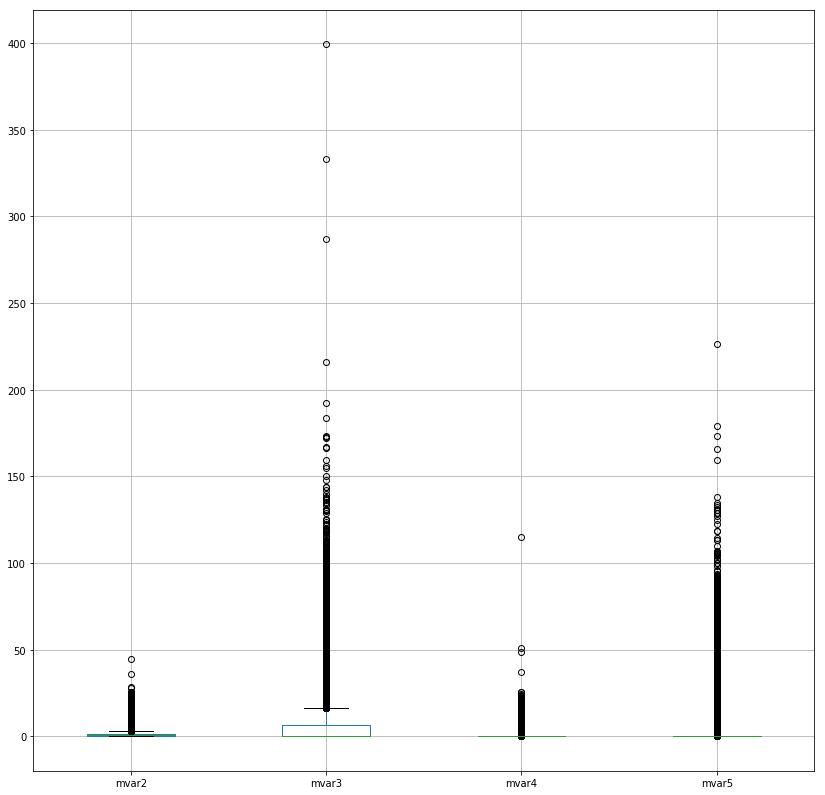

In [18]:
num_col=['mvar2','mvar3','mvar4','mvar5']#,'mvar14','mvar21','mvar22','mvar23','mvar24','mvar33','mvar44']
total_df[num_col].boxplot(figsize = (14,14))
#total_df.mvar2.plot('box')

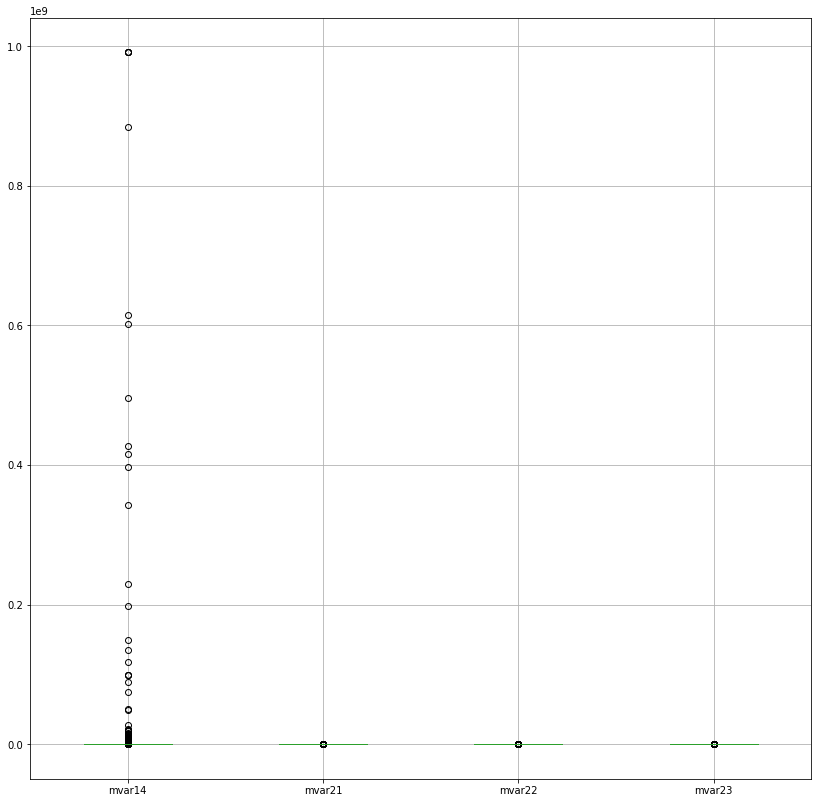

In [19]:
num_col=['mvar14','mvar21','mvar22','mvar23']#,'mvar24','mvar33','mvar44'
total_df[num_col].boxplot(figsize = (14,14))

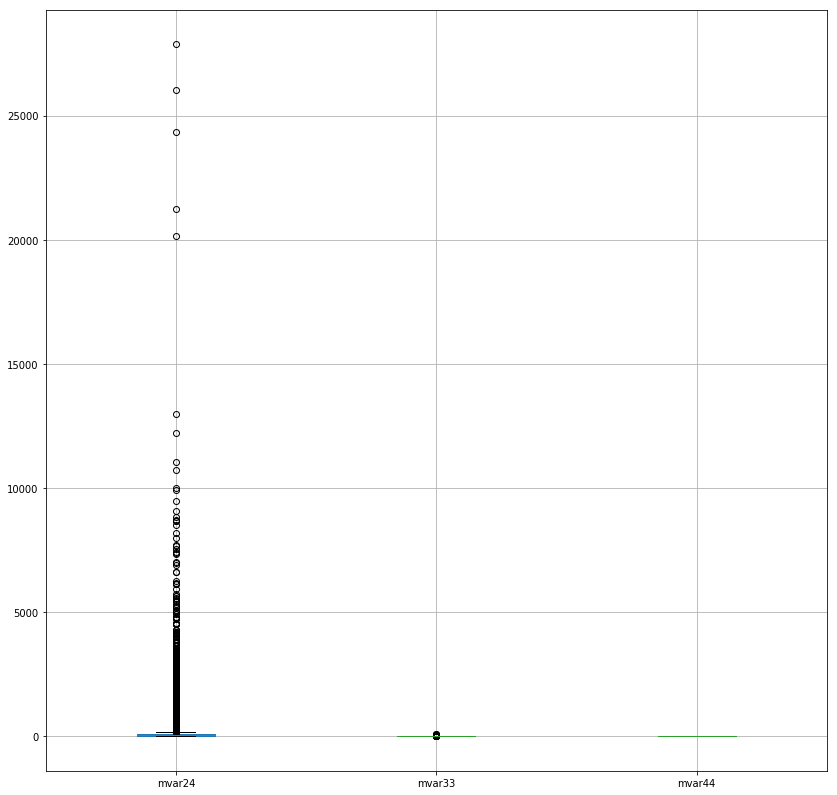

In [20]:
num_col=['mvar24','mvar33','mvar44']#,
total_df[num_col].boxplot(figsize = (14,14))

In [21]:
itrain_no_ol.mvar24.plot('box')

NameError: name 'itrain_no_ol' is not defined

In [22]:
outlier_col=['mvar2','mvar3','mvar4','mvar5','mvar14','mvar21','mvar22','mvar23','mvar24','mvar33']
def replace_outliers(df, outlier_col):
    for col in outlier_col:
        limit = df[col].quantile(0.99)
        df[col] = df[col].mask(df[col] > limit, limit)
    return df
itrain_no_ol=replace_outliers(total_df,outlier_col)

In [23]:
itrain_no_ol.describe()

,mvar2,mvar3,mvar4,mvar5,mvar14,mvar21,mvar22,mvar23,mvar24,mvar33,mvar44,default_ind
count,97493.000000,104329.000000,104329.000000,104329.000000,105000.000000,75052.000000,66045.000000,51353.000000,79981.000000,102633.000000,94630.000000,105000.000000
mean,1.033489,5.206359,0.427237,0.907999,95547.336810,57.067234,4333.093538,4225.316445,56.067497,7.013079,0.707448,-237.669552
std,1.369705,9.718565,1.497060,3.934743,87879.636693,33.765589,3653.526507,3688.319088,83.022088,7.481276,0.245552,425.598851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.083300,0.060660,-999.000000
25%,0.130100,0.000000,0.000000,0.000000,42613.000000,26.290000,651.890000,487.500000,9.460000,1.250000,0.517203,0.000000
50%,0.514000,0.300000,0.000000,0.000000,72343.000000,59.145500,3865.330000,3616.390000,39.510000,4.000000,0.739980,0.000000
75%,1.393800,6.595000,0.000000,0.000000,123875.000000,86.459250,7518.180000,7473.010000,75.700000,10.666700,0.945530,0.000000
max,7.493208,51.290800,8.102000,28.263000,594600.000000,134.709200,12828.877200,12811.854800,629.344000,31.833300,1.000000,1.000000


In [24]:
# we use .str to replace and then convert to float
#orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)
#itrain_no_ol['mvar6']=itrain_no_ol.mvar6.str.replace('missing',np.nan,'').astype(float)
#itrain_no_ol.mvar2=itrain_no_ol.mvar2.replace({"N/A":np.nan})
itrain_obj=itrain_no_ol.select_dtypes(include=['object'])
for col in itrain_obj.columns:
    if col!='mvar47':
        itrain_no_ol[col]=itrain_no_ol[col].replace({"missing":np.nan,"N/A":np.nan,"na":np.nan}).astype(float)

In [25]:
itrain_no_ol.describe()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,default_ind
count,100189.000000,97493.000000,104329.000000,104329.000000,104329.000000,79809.000000,9.515300e+04,79796.000000,8.998300e+04,1.043280e+05,45791.000000,86335.000000,9.206900e+04,105000.000000,6.269600e+04,80400.000000,83959.000000,85438.000000,104989.000000,104328.000000,75052.000000,66045.000000,51353.000000,79981.000000,94919.000000,90836.000000,87392.000000,104328.000000,104328.000000,56986.000000,30955.000000,94919.000000,102633.000000,104328.000000,60580.000000,101090.000000,94919.000000,104328.000000,96965.000000,22571.000000,32730.000000,102443.000000,103894.000000,94630.000000,47019.000000,74979.000000,105000.000000
mean,1747.214225,1.033489,5.206359,0.427237,0.907999,1653.958827,1.773459e+04,6883.071182,3.448616e+04,3.069648e+04,5453.724334,7094.953634,1.618299e+04,95547.336810,2.933575e+05,0.227400,0.261437,0.267562,0.917887,1.002387,57.067234,4333.093538,4225.316445,56.067497,1779.367039,3424.069840,3145.664065,8777.432607,5560.724063,2624.933843,3639.386400,478.379629,7.013079,0.226890,0.191070,6.365417,4.353185,4.220612,0.090043,98.020087,72.111246,0.333469,6.523870,0.707448,0.071375,0.092746,-237.669552
std,95.273047,1.369705,9.718565,1.497060,3.934743,3738.815394,4.629545e+04,10193.934370,5.245283e+04,6.628604e+04,13574.354629,11802.841866,6.403489e+04,87879.636693,3.048408e+05,0.613892,0.703039,0.710369,1.686849,1.738297,33.765589,3653.526507,3688.319088,83.022088,1316.815146,2949.675214,2710.109240,13538.312359,3246.851948,1555.513096,2039.269563,526.020314,7.481276,0.669097,0.556241,5.256378,4.703602,3.925974,0.415636,29.966945,24.472220,0.376285,6.267477,0.245552,0.290229,0.336760,425.598851
min,1493.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.387000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083300,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.014000,0.000000,0.000000,0.000000,0.060660,0.000000,0.000000,-999.000000
25%,1679.000000,0.130100,0.000000,0.000000,0.000000,38.000000,1.758000e+03,495.000000,3.518000e+03,1.118000e+03,555.000000,694.000000,6.420000e+02,42613.000000,1.282578e+05,0.000000,0.000000,0.000000,0.000000,0.000000,26.290000,651.890000,487.500000,9.460000,844.000000,1156.000000,1065.000000,30.000000,3285.000000,1186.000000,2068.000000,100.500000,1.250000,0.000000,0.000000,3.000000,1.000000,2.000000,0.000000,90.130500,58.254000,0.000000,2.000000,0.517203,0.000000,0.000000,0.000000
50%,1743.000000,0.514000,0.300000,0.000000,0.000000,297.000000,7.084000e+03,2504.000000,1.463600e+04,9.603000e+03,1801.000000,2945.000000,4.403000e+03,72343.000000,2.168240e+05,0.000000,0.000000,0.000000,0.000000,0.000000,59.145500,3865.330000,3616.390000,39.510000,1504.000000,2768.000000,2585.000000,243.000000,5080.000000,2829.000000,3559.000000,310.000000,4.000000,0.000000,0.000000,5.000000,3.000000,3.000000,0.000000,100.000000,78.898500,0.200000,5.000000,0.739980,0.000000,0.000000,0.000000
75%,1813.000000,1.393800,6.595000,0.000000,0.000000,1423.000000,1.831100e+04,9910.000000,4.512850e+04,3.463325e+04,5129.000000,8597.500000,1.514100e+04,123875.000000,3.666700e+05,0.000000,0.000000,0.000000,1.000000,1.000000,86.459250,7518.180000,7473.010000,75.700000,2388.000000,4806.000000,4410.000000,30386.000000,7330.000000,3863.000000,4745.000000,679.000000,10.666700,0.000000,0.000000,8.000000,7.000000,6.000000,0.000000,111.317500,91.666000,0.571430,10.000000,0.945530,0.000000,0.000000,0.000000
max,1950.000000,7.493208,51.290800,8.102000,28.263000,136595.000000,5.549600e+06,291810.0000

In [26]:
itrain_no_ol[itrain_no_ol.mvar2.isnull()]
for col in itrain_no_ol.columns:
    if col!='mvar47':
        mean_val=itrain_no_ol[col].mean()
        itrain_no_ol[col].fillna(mean_val,inplace=True)   

In [27]:
itrain_no_ol[itrain_no_ol.mvar2.isnull()]
itrain_no_ol['mvar2'].median()
#total_data.TotalBsmtSF.value_counts()
#total_data.TotalBsmtSF.fillna(989.5,inplace=True)

0.6007

In [28]:
itrain_no_ol

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
application_key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
230032,1696.000000,1.654100,0.000000,0.000000,0.000000,0.000000,6015.0000,322.000000,40369.000000,1.841400e+04,5453.724334,6423.000000,3067.000000,123875,2.933575e+05,1.0000,1.000000,1.000000,3.0,3.000000,94.780000,8987.180000,4225.316445,72.250000,1462.000000,4532.00000,2890.000000,61.000000,4532.000000,1095.000000,3376.0000,625.000000,1.166700,1.00000,0.00000,8.000000,10.000000,4.000000,1.000000,73.780000,82.547000,0.086960,10.00000,0.638990,0.071375,0.000000,C,0
230033,1846.000000,0.809500,0.000000,0.000000,0.000000,102.000000,7532.0000,3171.000000,18234.000000,1.366400e+04,5453.724334,765.000000,1931.000000,42613,2.933575e+05,0.0000,0.000000,0.000000,0.0,0.000000,74.250000,953.060000,953.060000,4.800000,1028.000000,2099.00000,2099.000000,30386.000000,2281.000000,2624.933843,2251.0000,169.000000,0.416700,0.00000,0.00000,8.000000,0.000000,2.000000,0.000000,99.129000,72.111246,0.000000,13.00000,0.638360,0.071375,0.092746,L,1
230034,1745.000000,0.400100,0.000000,0.000000,0.000000,1653.958827,2536.0000,6883.071182,34486.158485,2.536000e+03,5453.724334,7094.953634,16182.991865,76109,2.933575e+05,0.2274,0.261437,0.267562,0.0,0.000000,57.067234,4333.093538,4225.316445,56.067497,1779.367039,3424.06984,3145.664065,669.000000,4623.000000,3772.000000,3639.3864,478.379629,25.083300,0.00000,0.19107,1.000000,4.353185,1.000000,0.000000,98.020087,29.290000,0.000000,1.00000,1.000000,0.071375,0.000000,C,1
230035,1739.000000,0.219300,0.000000,0.000000,0.000000,1982.000000,26440.0000,4955.000000,20316.000000,3.701300e+04,5453.724334,0.000000,0.000000,84235,2.933575e+05,0.0000,0.000000,0.000000,0.0,0.000000,57.067234,0.000000,4225.316445,0.000000,1308.000000,2525.00000,791.000000,91.000000,5992.000000,2624.933843,3741.0000,215.000000,10.333300,0.00000,0.00000,3.000000,3.000000,2.000000,0.000000,96.272000,72.111246,0.153850,3.00000,0.532410,0.000000,0.000000,L,0
230036,1787.000000,0.011800,0.225000,0.000000,0.000000,5451.000000,5494.0000,5494.000000,7987.000000,4.696000e+03,5453.724334,2257.000000,27815.000000,123875,5.248480e+05,0.0000,0.000000,0.000000,0.0,0.000000,20.510000,796.670000,4225.316445,28.720000,801.000000,2281.00000,2281.000000,487.000000,2707.000000,2624.933843,1947.0000,158.000000,0.916700,0.00000,0.00000,2.000000,3.000000,2.000000,0.000000,115.019000,72.111246,0.000000,1.00000,0.926650,0.071375,0.092746,L,0
230037,1579.000000,1.033489,3.502000,0.000000,0.000000,1653.958827,17734.5915,6883.071182,34486.158485,0.000000e+00,199.000000,7094.953634,16182.991865,77298,2.933575e+05,0.2274,0.261437,0.267562,0.0,0.000000,57.067234,4333.093538,4225.316445,56.067497,1779.367039,3424.06984,3145.664065,183.000000,973.000000,2624.933843,3639.3864,478.379629,1.333300,0.00000,0.19107,2.000000,4.353185,2.000000,0.090043,98.020087,72.111246,1.500000,0.00000,0.707448,0.071375,0.092746,C,1
230038,1818.000000,0.400100,0.000000,0.000000,0.000000,1653.958827,1088.0000,6883.071182,1536.000000,1.498000e+03,5453.724334,448.000000,2331.000000,123875,2.933575e+05,0.2274,0.000000,0.000000,0.0,0.000000,57.067234,4333.093538,4225.316445,29.160000,1034.000000,760.00000,3145.664065,30386.000000,3437.000000,2624.933843,791.0000,34.000000,9.333300,0.00000,0.19107,2.000000,0.000000,0.000000,0.000000,88.171000,72.111246,0.000000,2.00000,0.872240,0.071375,0.000000,C,1
230039,1747.214225,1.033489,5.206359,0.427237,0.907999,1653.958827,17734.5915,6883.071182,34486.158485,3.069648e+04,5453.724334,7094.953634,16182.991865,198200,1.263525e+06,0.2274,0.261437,0.267562,0.0,1.002387,57.067234,4333.093538,4225.316445,56.067497,1779.367039,3424.06984,3145.664065,8777.432607,5560.724063

In [29]:
#create train and test processed file
#train data
itrain_no_ol.loc[itrain_no_ol.default_ind!=-999].to_csv('train_data_processed',index=True)
#test data
columns=[columns for columns in total_df.columns if columns!='default_ind']
itrain_no_ol.loc[itrain_no_ol.default_ind==-999,columns].to_csv('test_data_processed',index=True)

In [30]:
train_data_new=pd.read_csv('train_data_processed.csv',index_col='application_key')
test_data_new=pd.read_csv('test_data_processed.csv',index_col='application_key')

In [31]:
cat_features = np.where(train_data_new.dtypes == object)[0]

In [32]:
train_X=train_data_new.loc[:, train_data_new.columns != 'default_ind']

In [33]:
train_Y=train_data_new.default_ind

In [34]:
model = CatBoostClassifier(iterations = 500, learning_rate= 0.01, class_weights = [0.2, 0.8], 
                          depth = 7, one_hot_max_size = 10, l2_leaf_reg = 250)
model.fit(train_X, train_Y,cat_features = cat_features,  early_stopping_rounds = 100,
          plot=True, verbose = 50)#eval_set=(X_test, y_test),

MetricVisualizer(layout=Layout(align_self=u'stretch', height=u'500px'))

0:	learn: 0.6891769	total: 2.53s	remaining: 21m 3s
50:	learn: 0.5713179	total: 6.15s	remaining: 54.1s
100:	learn: 0.5290151	total: 9.62s	remaining: 38s
150:	learn: 0.5102049	total: 13.4s	remaining: 31s
200:	learn: 0.5005190	total: 17.2s	remaining: 25.6s
250:	learn: 0.4948062	total: 21s	remaining: 20.8s
300:	learn: 0.4910345	total: 24.8s	remaining: 16.4s
350:	learn: 0.4882885	total: 28.4s	remaining: 12.1s
400:	learn: 0.4861371	total: 32s	remaining: 7.9s
450:	learn: 0.4843703	total: 36s	remaining: 3.91s
499:	learn: 0.4828160	total: 39.6s	remaining: 0us


In [35]:
catc_pridicted=model.predict(test_data_new)

In [36]:
my_first_sub=pd.DataFrame({'application_id':test_data_new.index,'Value':catc_pridicted})

In [ ]:
my_first_sub.to_csv('Submission',index=False)